In [ ]:
import pandas as pd

# Specify the file path and sheet name you want to download
file_path = '/content/AssignmentData.xlsx'  # Path to the original Excel file
sheet_name = 'WorkerFunnel'  # Sheet name to download

# Read the specific sheet from the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Save the sheet to a new Excel file
output_file_path = '/content/workfunnel.xlsx'  # Path for the new Excel file
df.to_excel(output_file_path, index=False)

print(f"Sheet '{sheet_name}' has been saved to '{output_file_path}'")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  object 
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  object 
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  object 
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<ipython-input-4-192770534ca6>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


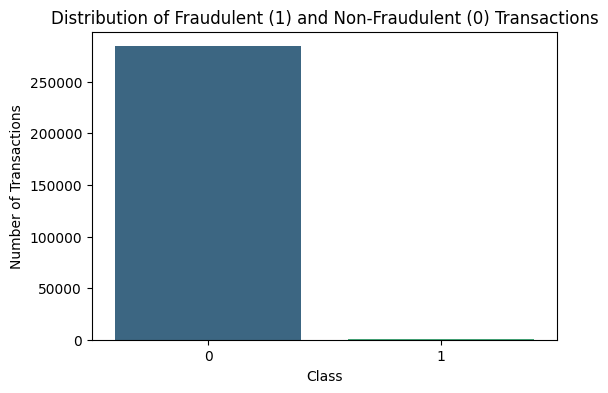

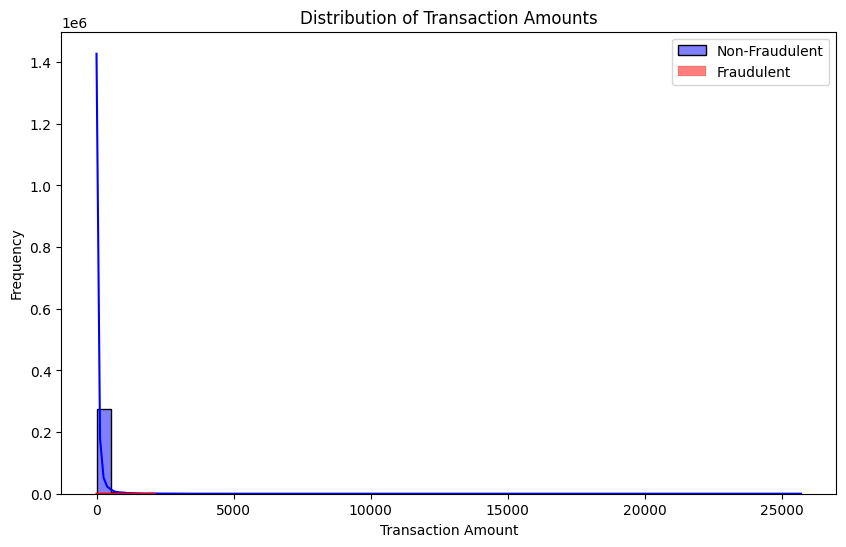

Non-Numeric Columns: Index(['V2', 'V7', 'V9', 'V24'], dtype='object')


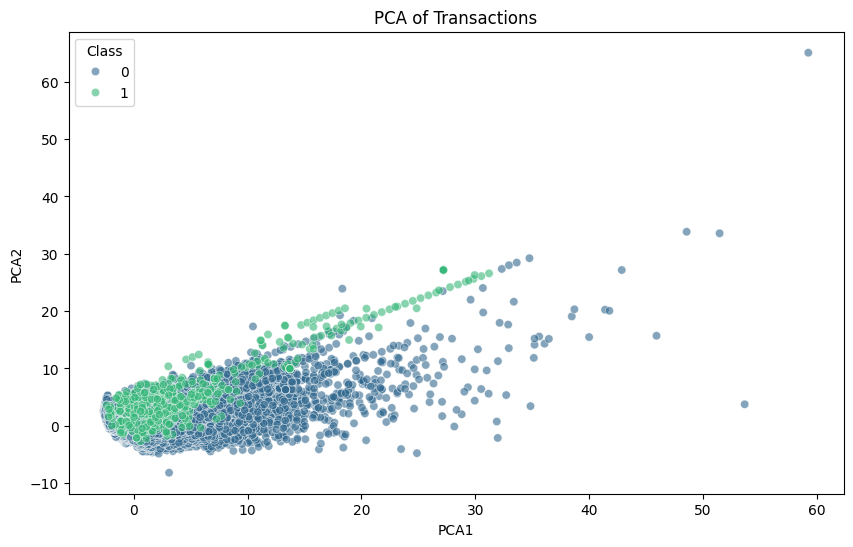

Isolation Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.30      0.29      0.30       492

    accuracy                           1.00    284807
   macro avg       0.65      0.65      0.65    284807
weighted avg       1.00      1.00      1.00    284807

ROC AUC Score: 0.6467597952231215

Local Outlier Factor
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807

ROC AUC Score: 0.49914707278898407


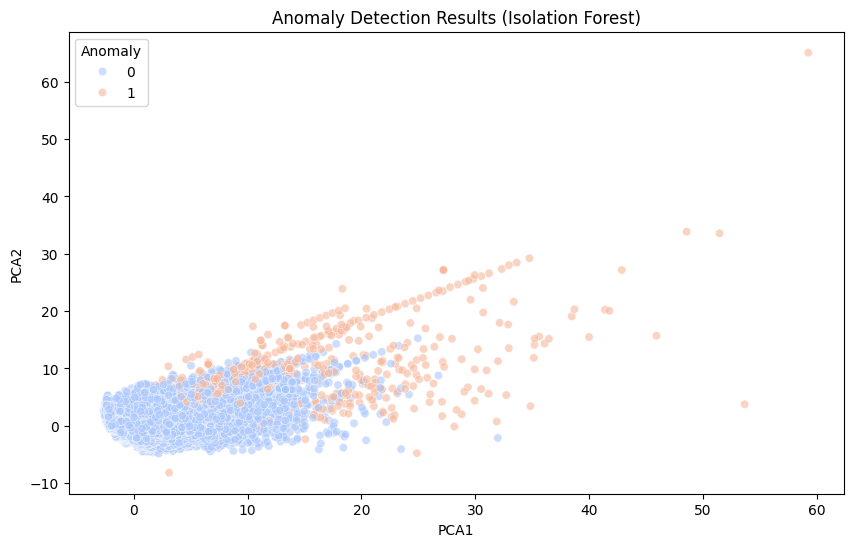

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# Step 1: Data Import and Exploration

# Load the dataset
file_path = '/content/creditcard.xlsx'
transactions = pd.read_excel(file_path)

# Display basic information about the dataset
print(transactions.info())

# Check for any missing values
print(transactions.isnull().sum())

# Display the first few rows of the dataset
print(transactions.head())

# Distribution of the Class column
class_distribution = transactions['Class'].value_counts()
print("Class Distribution:\n", class_distribution)

# Visualize the distribution of the Class column
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Distribution of Fraudulent (1) and Non-Fraudulent (0) Transactions')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.show()

# Visualize the distribution of transaction amounts for both fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(transactions[transactions['Class'] == 0]['Amount'], bins=50, kde=True, color='blue', label='Non-Fraudulent')
sns.histplot(transactions[transactions['Class'] == 1]['Amount'], bins=50, kde=True, color='red', label='Fraudulent')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 2: Feature Engineering

# Check for non-numeric columns
non_numeric_columns = transactions.select_dtypes(exclude=[np.number]).columns
print("Non-Numeric Columns:", non_numeric_columns)

# Remove non-numeric columns if any
if len(non_numeric_columns) > 0:
    transactions = transactions.drop(columns=non_numeric_columns)

# Scale Amount and Time
scaler = StandardScaler()
transactions[['Amount', 'Time']] = scaler.fit_transform(transactions[['Amount', 'Time']])

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(transactions.drop(columns=['Class']))

# Add the PCA results to the transactions dataframe
transactions['PCA1'] = pca_transformed[:, 0]
transactions['PCA2'] = pca_transformed[:, 1]

# Visualize the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Class', data=transactions, palette='viridis', alpha=0.6)
plt.title('PCA of Transactions')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Step 3: Anomaly Detection Model

# Define the features and labels
X = transactions.drop(columns=['Class'])
y = transactions['Class']

# Initialize models
iso_forest = IsolationForest(contamination=0.0017, random_state=42)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.0017)

# Fit the models
iso_forest.fit(X)
y_pred_iso = iso_forest.predict(X)
y_pred_lof = lof.fit_predict(X)

# Convert predictions to 0 (normal) and 1 (fraud)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]
y_pred_lof = [1 if x == -1 else 0 for x in y_pred_lof]

# Evaluate the models
print("Isolation Forest")
print(classification_report(y, y_pred_iso))
print("ROC AUC Score:", roc_auc_score(y, y_pred_iso))

print("\nLocal Outlier Factor")
print(classification_report(y, y_pred_lof))
print("ROC AUC Score:", roc_auc_score(y, y_pred_lof))

# Step 4: Visualizing Anomalies

# Visualize the anomalies detected by the Isolation Forest
transactions['Anomaly'] = y_pred_iso

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Anomaly', data=transactions, palette='coolwarm', alpha=0.6)
plt.title('Anomaly Detection Results (Isolation Forest)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Step 5: Fraud Detection Function

def detect_fraud(new_data, model):
    # Assuming new_data is a dataframe with similar structure as the original dataset
    new_data = new_data.drop(columns=non_numeric_columns, errors='ignore')  # Remove non-numeric columns if present
    new_data[['Amount', 'Time']] = scaler.transform(new_data[['Amount', 'Time']])
    y_pred = model.predict(new_data.drop(columns=['Class'], errors='ignore'))
    fraudulent_transactions = new_data[y_pred == -1]
    return fraudulent_transactions

